Задание
1.	Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2.	Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3.	Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4.	Проанализируйте CTR с разбивкой по рекламной кампании.
5.	Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6.	Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7.	Посчитайте конверсию из клика в покупку.
Описание данных
•	ad_id – идентификатор объявления (рекламы)
•	xyz_campaign_id – идентификатор рекламной кампании в базе компании X
•	fb_campaign_id – идентификатор кампании в Facebook
•	age – возрастная группа, которой показывалась реклама
•	gender – пол тех, кому показывалась реклама
•	interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
•	impressions – число показов
•	clicks – число кликов
•	spent – сумма, которую компания потратила на показ объявления 
•	total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
•	approved_conversion – количество людей, которые купили продукт после просмотра рекламы


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

In [5]:
df = pd.read_csv('conversion.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [7]:
df.shape

(1143, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [13]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения

<Figure size 1200x600 with 0 Axes>

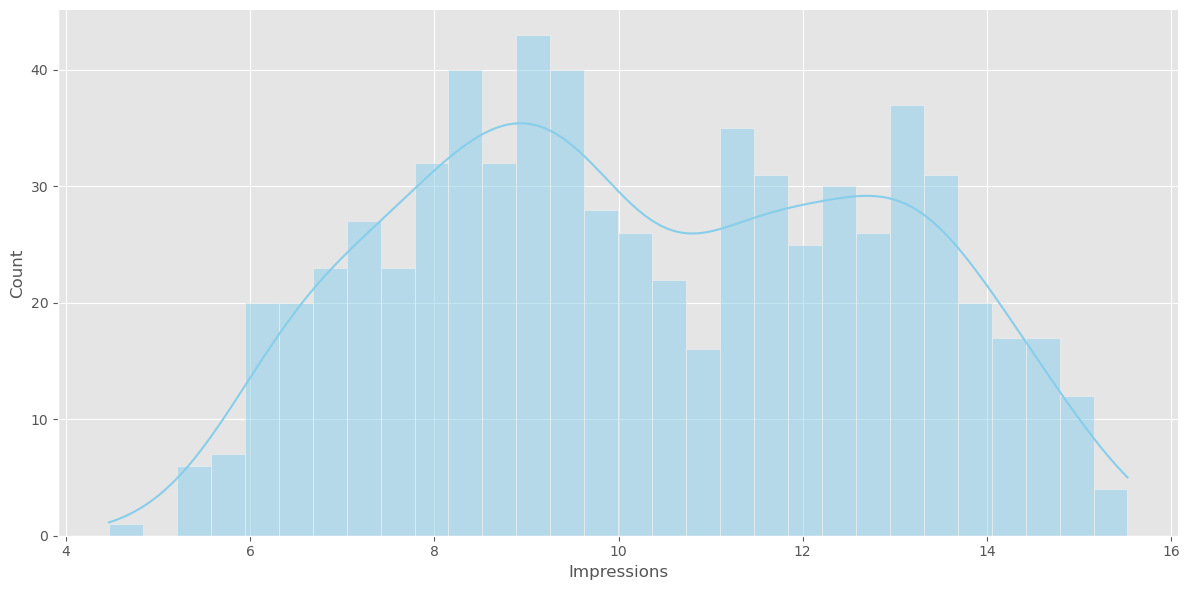

In [100]:
mpl.style.use('ggplot')
plt.figure(figsize=(12, 6), facecolor='#A9A9A9')
sns.displot(np.log(df.groupby('fb_campaign_id')['Impressions'].sum()),kde=True, color='skyblue', bins=30, height=6, aspect=2)

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id)



In [76]:
df['CTR'] = df['Clicks']/df['Impressions'] * 100

In [86]:
df['CTR'] = df['CTR'].round(3)
df['CTR']

0       0.014
1       0.011
2       0.000
3       0.023
4       0.024
        ...  
1138    0.022
1139    0.019
1140    0.018
1141    0.017
1142    0.022
Name: CTR, Length: 1143, dtype: float64

In [88]:
df['CTR'].describe()

count    1143.000000
mean        0.016417
std         0.011515
min         0.000000
25%         0.010000
50%         0.016000
75%         0.023000
max         0.106000
Name: CTR, dtype: float64

Text(0.5, 1.0, 'График распределения CTR с разделением по идентификаторам в базе')

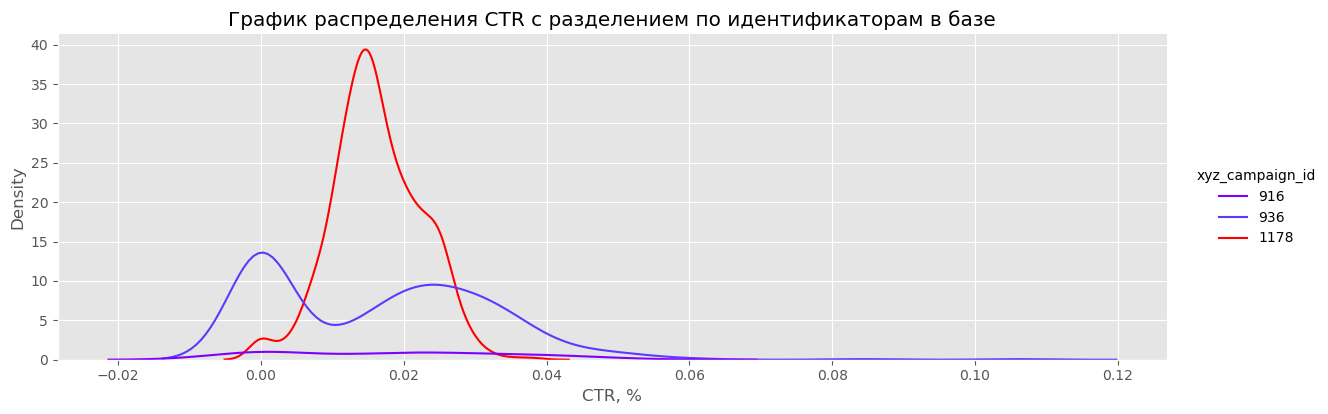

In [154]:
sns.displot(data=df, x='CTR',kind="kde", hue='xyz_campaign_id', palette="rainbow", height=4, aspect=3)
plt.xlabel('CTR, %')
plt.title('График распределения CTR с разделением по идентификаторам в базе')

Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 

In [176]:
df['CPC'] = df['Spent']/df['Clicks']
df['CPC']

0       1.430000
1       0.910000
2            NaN
3       1.250000
4       1.290000
          ...   
1138    1.421389
1139    1.449000
1140    1.438929
1141    1.471926
1142    1.452719
Name: CPC, Length: 1143, dtype: float64

Меры центральной тенденции: среднее,медина и мода.

In [178]:
df['CPC'].mean()

1.4993474467280832

In [180]:
df['CPC'].median()

1.498273039292763

In [193]:
from statistics import mode

In [195]:
mode(df['CPC'])

1.480000019

Меры изменчивости: дисперсия, стандартное отклонение, размах и коэфициент вариации

In [207]:
df['CPC'].var() # Дисперсия

0.05423249416487705

In [209]:
df['CPC'].std()# Стандартное отклонение

0.23287871127451099

In [211]:
df['CPC'].max() - df['CPC'].min() # Размах

2.0319999330000003

In [205]:
df['CPC'].std()/df['CPC'].mean()*100 # Коэфициент вариации

15.532004391824273

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 	Посчитайте конверсию из клика в покупку


Text(0.5, 1.0, 'График распределения CPC с разделением по полу')

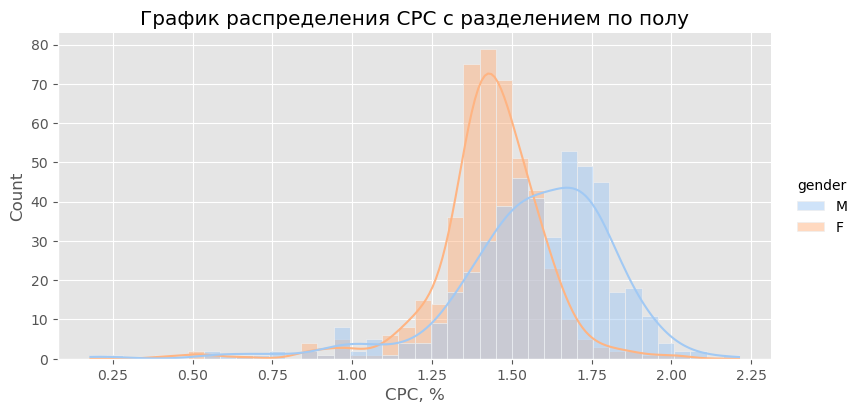

In [219]:
sns.displot(data=df, x='CPC', kde=True, hue='gender', palette="pastel", height=4, aspect=2)
plt.xlabel('CPC, %')
plt.title('График распределения CPC с разделением по полу')

In [223]:
df['Clicks_to_buy_rate'] = df['Approved_Conversion']/df['Clicks']
df['Clicks_to_buy_rate']

0       1.000000
1       0.000000
2            NaN
3       0.000000
4       1.000000
          ...   
1138    0.007937
1139    0.000000
1140    0.000000
1141    0.014815
1142    0.017544
Name: Clicks_to_buy_rate, Length: 1143, dtype: float64